# SpaceX Falcon 9 First Stage Landing Prediction
# Assignment: Exploring and Preparing Data

In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.

Falcon 9 first stage will land successfully

# Objectives

Perform exploratory Data Analysis and Feature Engineering using Pandas and Matplotlib

- Exploratory Data Analysis
- Preparing Data Feature Engineering

# Import Libraries and Define Auxiliary Functions
We will import the following libraries the lab

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("dataset_part_2.csv")
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the **FlightNumber** (indicating the continuous launch attempts.) and **Payload** variables would affect the launch outcome.

We can plot out the **FlightNumber** vs. **PayloadMass** and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.

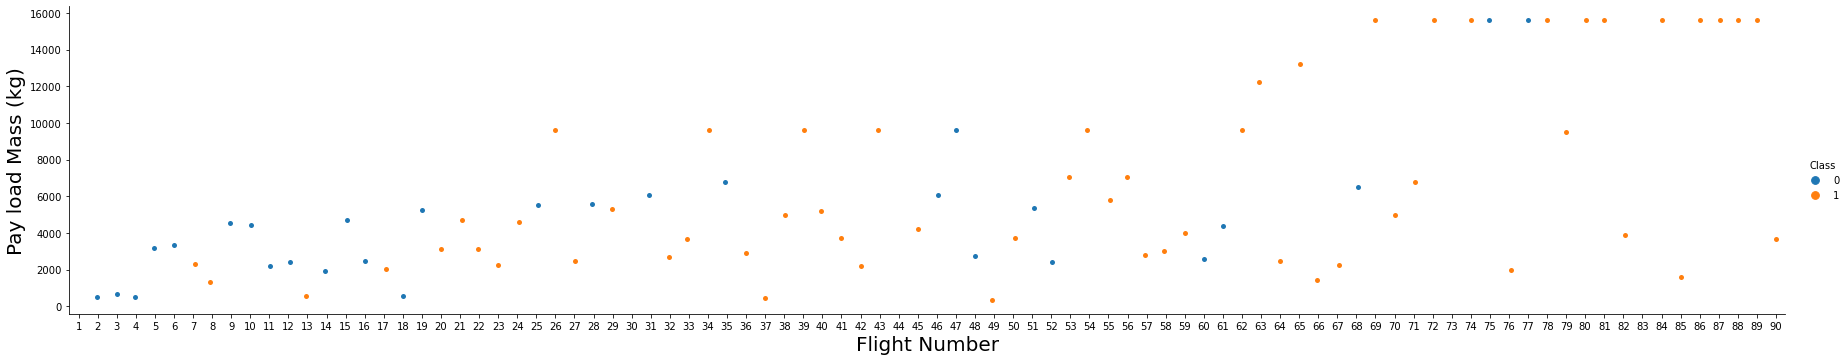

In [5]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates. **CCAFS LC-40,** has a success rate of 60 %, while **KSC LC-39A** and **VAFB SLC 4E** has a success rate of 77%.

Next, let's drill down to each site visualize its detailed launch records.

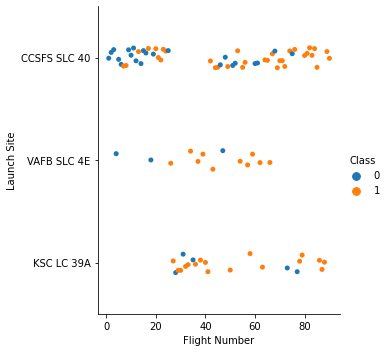

In [6]:
### TASK 1: Visualize the relationship between Flight Number and Launch Site
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df)
plt.xlabel("Flight Number")
plt.ylabel("Launch Site")
plt.show()

Use the function **catplot** to plot **FlightNumber*** vs **LaunchSite,** set the parameter **x** parameter to **FlightNumber,** set the **y** to **Launch Site** and set the parameter **hue** to **'class'**

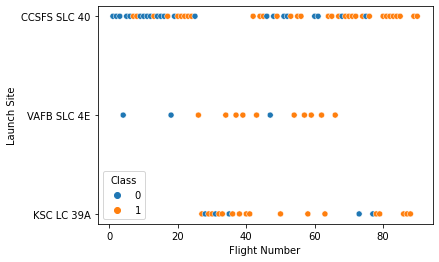

In [7]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.scatterplot(x='FlightNumber', y="LaunchSite", hue="Class", data=df)
plt.xlabel("Flight Number")
plt.ylabel("Launch Site")
plt.show()

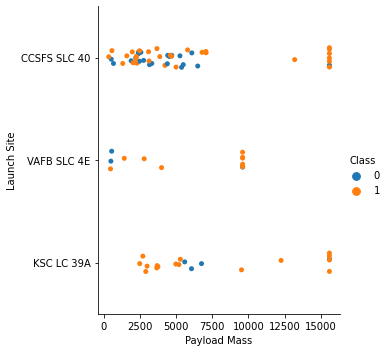

In [8]:
### TASK 2: Visualize the relationship between Payload and Launch Site
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df)
plt.xlabel("Payload Mass")
plt.ylabel("Launch Site")
plt.show()

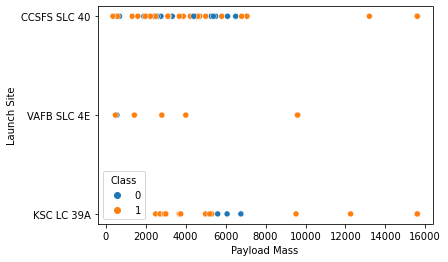

In [9]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.scatterplot(x='PayloadMass', y="LaunchSite", hue="Class", data=df)
plt.xlabel("Payload Mass")
plt.ylabel("Launch Site")
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC launchsite there are no rockets launched for heavypayload mass(greater than 10000).

In [10]:
### TASK  3: Visualize the relationship between success rate of each orbit type
Class= df['Class'].mean()

In [11]:
### TASK  3: Visualize the relationship between success rate of each orbit type
Orbit= df.groupby('Orbit')

Next, we want to visually check if there are any relationship between success rate and orbit type.

Let's create a **bar chart** for the sucess rate of each orbit

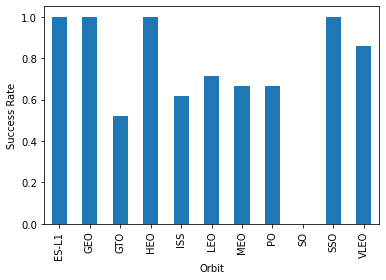

In [12]:
# HINT use groupby method on Orbit column and get the mean of Class column
df.groupby('Orbit')['Class'].mean().plot.bar()
plt.xlabel("Orbit")
plt.ylabel("Success Rate")
plt.show()

Analyze the ploted bar chart try to find which orbits have high sucess rate.


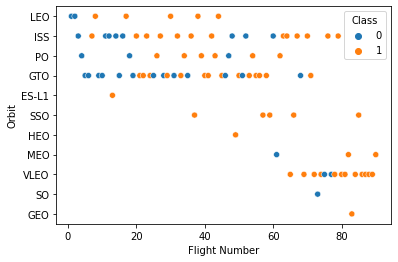

In [13]:
### TASK  4: Visualize the relationship between FlightNumber and Orbit type
sns.scatterplot(x='FlightNumber', y="Orbit", hue="Class", data=df)
plt.xlabel("Flight Number")
plt.ylabel("Orbit")
plt.show()

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

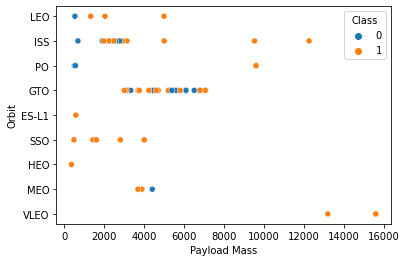

In [14]:
### TASK  5: Visualize the relationship between Payload and Orbit type
sns.scatterplot(x='PayloadMass', y="Orbit", hue="Class", data=df)
plt.xlabel("Payload Mass")
plt.ylabel("Orbit")
plt.show()

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.

You can plot a line chart with x axis to be **Year** and y axis to be average success rate, to get the average launch success trend.

The function will help you get the year from the date:

In [15]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


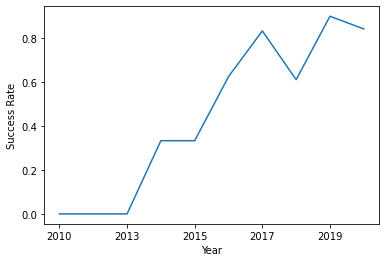

In [16]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
df.groupby('Date')['Class'].mean().plot()
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020

By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.

In [17]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,NaN,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.0,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.0,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.0,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.0,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [18]:
### TASK  7: Create dummy variables to categorical columns
features_one_hot = pd.get_dummies(df, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'], drop_first=False)
features_one_hot.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Outcome,Flights,GridFins,Reused,Legs,Block,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,2010,Falcon 9,NaN,None None,1,False,False,False,1.0,...,0,0,0,0,0,0,0,0,0,0
1,2,2012,Falcon 9,525.0,None None,1,False,False,False,1.0,...,0,0,0,0,0,0,0,0,0,0
2,3,2013,Falcon 9,677.0,None None,1,False,False,False,1.0,...,0,0,0,0,0,0,0,0,0,0
3,4,2013,Falcon 9,500.0,False Ocean,1,False,False,False,1.0,...,0,0,0,0,0,0,0,0,0,0
4,5,2013,Falcon 9,3170.0,None None,1,False,False,False,1.0,...,0,0,0,0,0,0,0,0,0,0


Use the function **get_dummies** and **features** dataframe to apply OneHotEncoder to the column **Orbits, LaunchSite, LandingPad, and Serial**. Assign the value to the variable **features_one_hot**, display the results using the method head. Your result dataframe must include all features including the encoded ones.

In [19]:
### TASK  8: Cast all numeric columns to `float64`
features_one_hot = features_one_hot.astype('float64', errors='ignore')

In [20]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)